In [1]:
import tensorflow as tf
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be compatible with Keras

# Define a simple perceptron model
model = Sequential([
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh'),  # Single perceptron
    Dense(3, activation='tanh')
])

# Compile the model
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Train the model for one epoch
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

2025-01-30 02:07:02.100588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.5189  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4003 - loss: 0.1293 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3258 - loss: 0.0722 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2180 - loss: 0.0584     
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 0.0424 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1960 - loss: 0.0374     
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2374 - loss: 0.0308 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 0.0271 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3002 - loss: 0.0202 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1482 - loss: 0.0189 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1531 - loss: 0.0183 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (10, 3)                │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (10, 3)                │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (10, 3)                │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
with tf.GradientTape() as t:
    t.watch(x_tensor)
    output = model(x_tensor)

result = output
gradients = t.gradient(output, x_tensor).numpy()
preds = model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(array([[40., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [45.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.],
        [47.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]]),
 array([-0.08334846,  0.02180638,  0.12696122,  0.23211604,  0.33727089,
         0.44242573,  0.54758054,  0.65273541,  0.75789022,  0.8630451 ,
         0.96819991]),
 <a list of 3 BarContainer objects>)

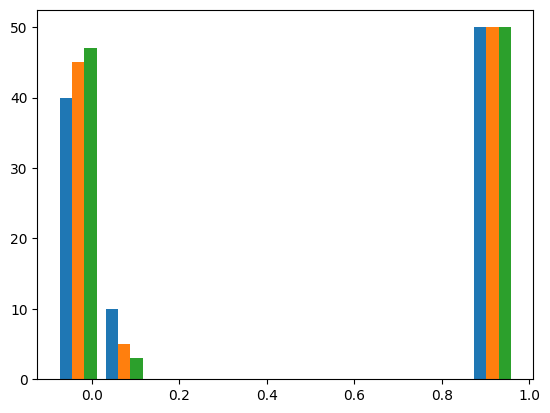

In [4]:
#plotten Sie ein histogram der Vorhersagen, den Mittelwert der Gradienten pro Vorhersage, plotten Sie dann den Fehler vs. die Gradienten
import matplotlib.pyplot as plt
plt.hist(preds)

(array([ 1.,  0., 34., 14., 13., 21.,  7.,  4.,  4.,  2.]),
 array([-0.04788258, -0.02912015, -0.01035773,  0.0084047 ,  0.02716712,
         0.04592955,  0.06469198,  0.0834544 ,  0.10221682,  0.12097925,
         0.13974167]),
 <BarContainer object of 10 artists>)

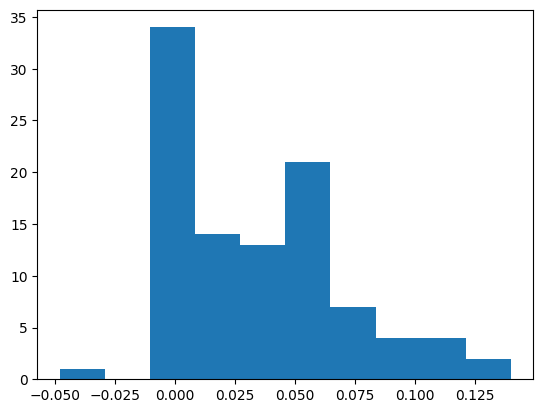

In [5]:
mean_gradients = np.mean(gradients, axis=1)
plt.hist(mean_gradients, bins=10)

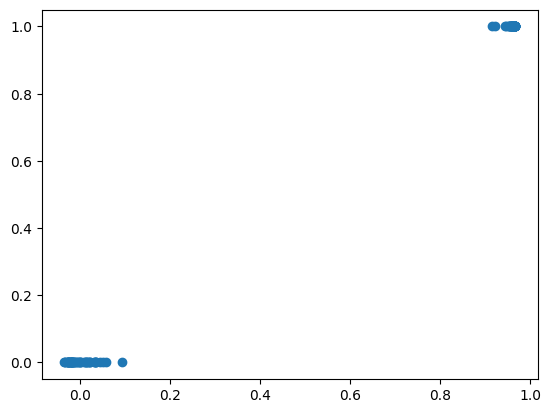

In [6]:
plt.scatter(preds[:, 0], y)

(array([[18., 14.,  6.,  6., 27., 12.,  6.,  3.,  1.,  2.,  0.,  2.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  1.],
        [41.,  4.,  3.,  0., 11., 23., 15.,  1.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.],
        [42.,  5.,  2., 17., 28.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.]]),
 array([5.83021667e-08, 2.89412770e-04, 5.78767237e-04, 8.68121705e-04,
        1.15747617e-03, 1.44683064e-03, 1.73618511e-03, 2.02553958e-03,
        2.31489404e-03, 2.60424851e-03, 2.89360298e-03, 3.18295745e-03,
        3.47231191e-03, 3.76166638e-03, 4.05102085e-03, 4.34037532e-03,
        4.62972978e-03, 4.91908425e-03, 5.20843872e-03, 5.49779319e-03,
        5.78714765e-03, 6.07650212e-03, 6.36585659e-03, 6.65521106e-03,
        6.94456552e-03, 7.233919

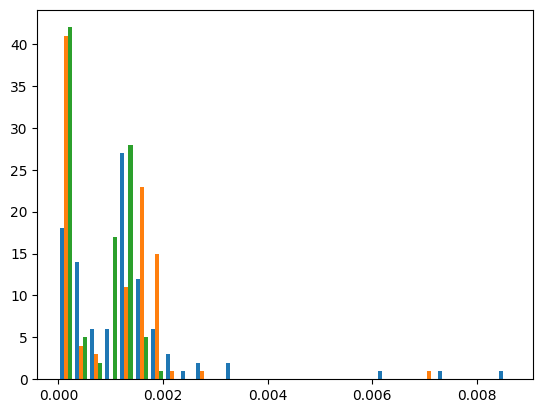

In [7]:
plt.hist((preds - y)**2, bins=30)

In [8]:
# lassen sie das modell nun für 100 Epochen trainieren und fertigen Sie die obrigen plots erneut an und vergleichen sie diese


code from 

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [10]:
num_classes = 2
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [11]:
model = Sequential()

model.add(Conv2D(32, [3, 3], input_shape = input_shape)) 
model.add(Activation("relu"))
model.add(Conv2D(64, [3, 3],))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/home/mmr/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
hist = model.fit(x_train[:2], y_train[:2], batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6871 - val_accuracy: 0.8539 - val_loss: 0.6645
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 1.0000 - loss: 0.5695 - val_accuracy: 0.7403 - val_loss: 0.6413
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 1.0000 - loss: 0.4427 - val_accuracy: 0.9078 - val_loss: 0.6045
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 1.0000 - loss: 0.2680 - val_accuracy: 0.9126 - val_loss: 0.5635
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.5000 - loss: 0.7243 - val_accuracy: 0.9102 - val_loss: 0.5166
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 1.0000 - loss: 0.4660 - val_accuracy: 0.8748 - val_loss: 0.4775
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 1.0000 - loss: 0.1130 - val_accuracy: 0.8374 - val_loss: 0.4441
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 1.0000 - loss: 0.2335 - val_accuracy: 0.8107 - val_loss: 0.

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test score:', score[0])
print('Test accuracy:', score[1])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8787 - loss: 0.3616

Test score: 0.30700814723968506
Test accuracy: 0.9033980369567871


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


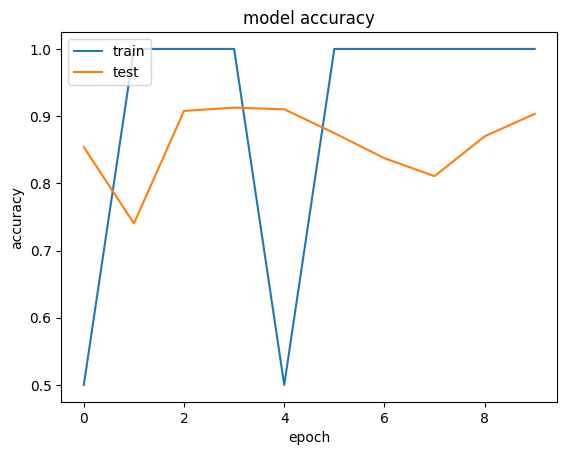

In [14]:
import matplotlib.pyplot as plt
# list all keys in history
print(hist.history.keys())

# visualize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<class 'numpy.ndarray'> (3, 3, 32)

Filter 1 in the first convolution layer : 
[[ 0.04114465  0.14153111  0.06333852]
 [ 0.0844026   0.14615744  0.0799614 ]
 [-0.0525599  -0.01763038  0.05174522]]


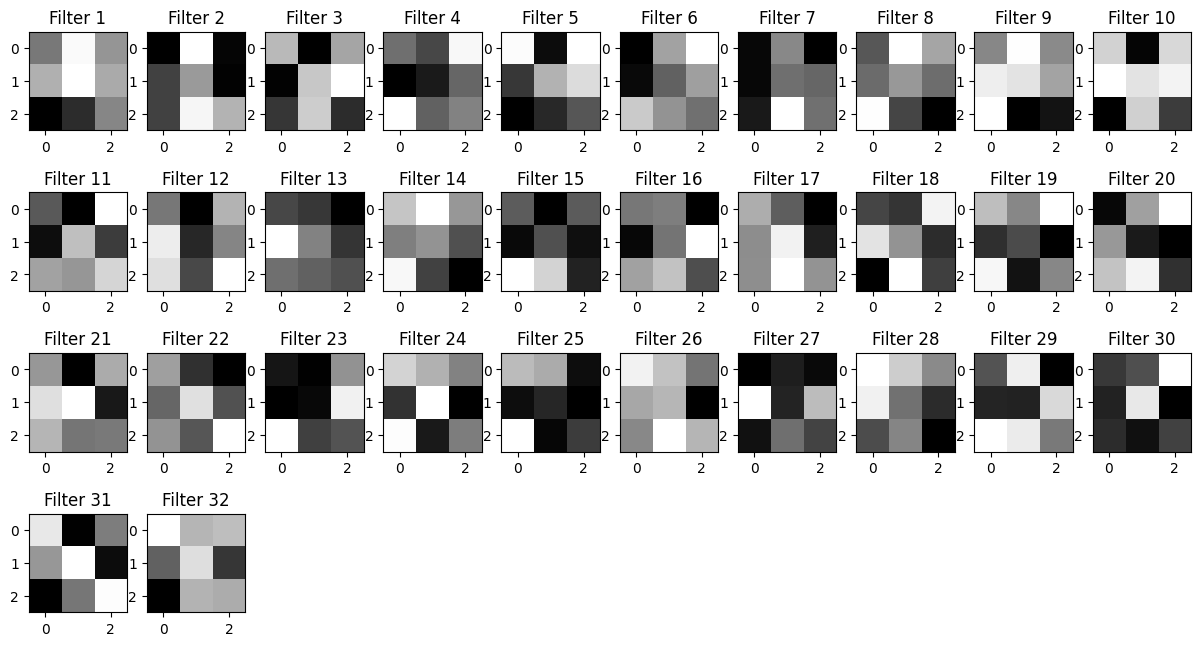

In [15]:
# get the weights of the first convolution layer and visualize the 32 filters

W1 = model.layers[0].get_weights()[0]
W1 = model.layers[0].get_weights()[0][:,:,0,:]

print(type(W1), W1.shape)
print()
print("Filter 1 in the first convolution layer : ")
print(W1[:,:,0])

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(W1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
(26, 26, 32)


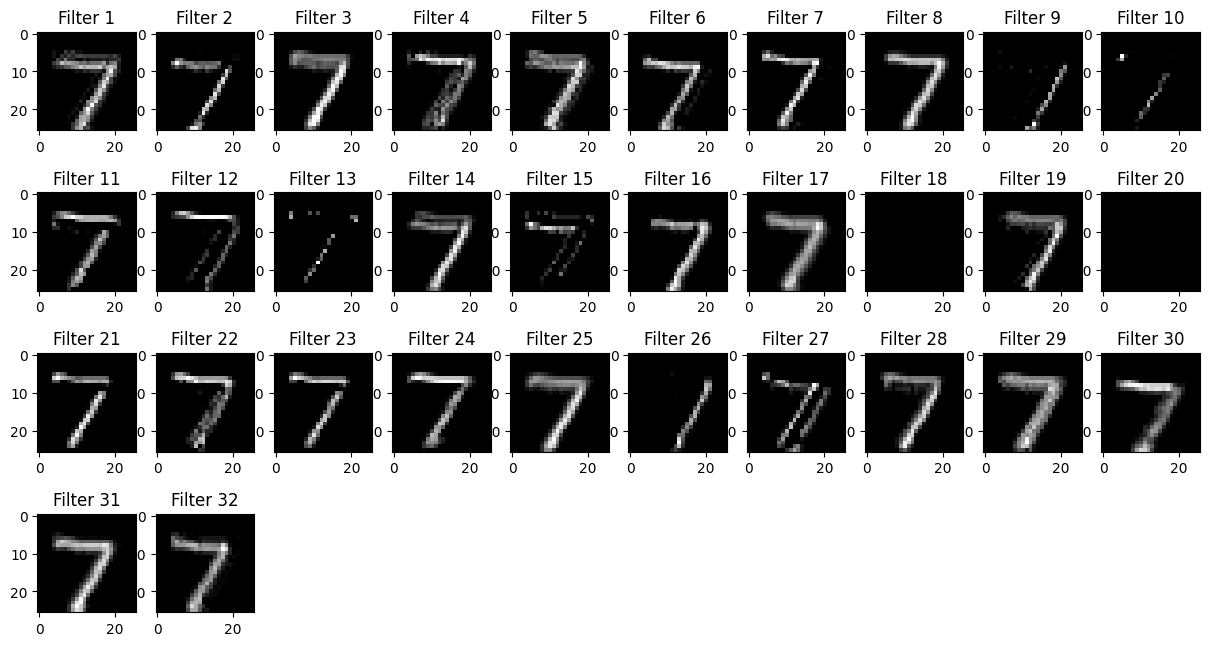

In [16]:
# extract output of the first convolution layer and plot the images from the 32 filters

model2 = Sequential()
model2.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model2.add(Activation("relu"))

x_rep = model2.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,32):
    plt.subplot(4,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
(24, 24, 64)


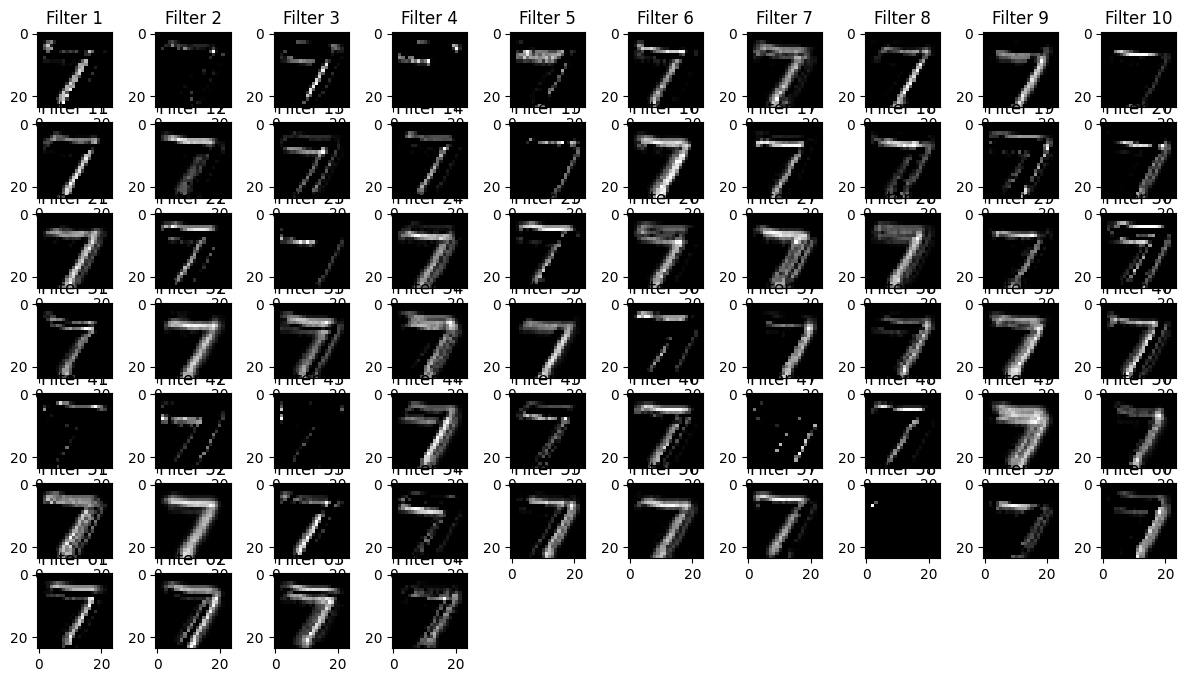

In [17]:
# extract output of the second convolution layer and plot the images from the 64 filters

model3 = Sequential()
model3.add(Conv2D(32, [3, 3])) #, border_mode='same', weights=model.layers[0].get_weights(), input_shape=input_shape))
model3.add(Activation("relu"))
model3.add(Conv2D(64, [3, 3])) #, border_mode='same', weights=model.layers[2].get_weights()))
model3.add(Activation("relu"))

x_rep = model3.predict(x_test[0:10]) # representation of the first 10 test samples
x_rep_1 = x_rep[0,:,:,:]  # only look into the first test sample, which is a 7 digit
print(x_rep_1.shape)

plt.figure(1, figsize=(15,8))

for i in range(0,64):
    plt.subplot(7,10,i+1)
    plt.title('Filter ' + str(i+1))
    plt.imshow(x_rep_1[:,:,i],interpolation="nearest",cmap="gray")
    
plt.show()